In [9]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
path_models=[]
tf_dataset_tests=[]

L200_Model="/mnt/0A60B2CB60B2BD2F/Projects/flow_regime_recognition_CameraPosition/datasets_preprocessed/Left200/2022-11-07 16:43:59.702466 Final 3/cnn_acc84.0_auc0.9.h5"
path_models.append(("L200_Model",L200_Model))

L200_Data="/mnt/0A60B2CB60B2BD2F/Projects/flow_regime_recognition_CameraPosition/datasets_preprocessed/Left200/2022-11-07 16:43:59.702466 Final 3/tf_dataset_test.tf"
tf_dataset_tests.append(("L200_Data",L200_Data))

F200_Model="/mnt/0A60B2CB60B2BD2F/Projects/flow_regime_recognition_CameraPosition/datasets_preprocessed/Front200/2022-11-07 12:01:14.955083 Final 1/cnn_acc96.0_loss0.1.h5"
path_models.append(("F200_Model",F200_Model))

F200_Data="/mnt/0A60B2CB60B2BD2F/Projects/flow_regime_recognition_CameraPosition/datasets_preprocessed/Front200/2022-11-07 12:01:14.955083 Final 1/tf_dataset_test.tf"
tf_dataset_tests.append(("F200_Data",F200_Data))

R200_Model="/mnt/0A60B2CB60B2BD2F/Projects/flow_regime_recognition_CameraPosition/datasets_preprocessed/Right200/2022-11-07 21:13:52.831721 Final 3/cnn_acc94.0_auc1.0.h5"
path_models.append(("R200_Model",R200_Model))

R200_Data="/mnt/0A60B2CB60B2BD2F/Projects/flow_regime_recognition_CameraPosition/datasets_preprocessed/Right200/2022-11-07 21:13:52.831721 Final 3/tf_dataset_test.tf"
tf_dataset_tests.append(("R200_Data",R200_Data))

RA50_Model="/mnt/0A60B2CB60B2BD2F/Projects/flow_regime_recognition_CameraPosition/datasets_preprocessed/RightAngled50/2022-11-08 17:34:40.437549/cnn_acc85.0_auc0.9.h5"
path_models.append(("RA50_Model",RA50_Model))
RA50_Data="/mnt/0A60B2CB60B2BD2F/Projects/flow_regime_recognition_CameraPosition/datasets_preprocessed/RightAngled50/2022-11-08 17:34:40.437549/tf_dataset_test.tf"
tf_dataset_tests.append(("RA50_Data",RA50_Data))

R80_Model="/mnt/0A60B2CB60B2BD2F/Projects/flow_regime_recognition_CameraPosition/datasets_preprocessed/Right80/2022-11-01 23:21:54.774594/cnn_acc85.0_loss0.3.h5"
path_models.append(("R80_Model",R80_Model))
R80_Data="/mnt/0A60B2CB60B2BD2F/Projects/flow_regime_recognition_CameraPosition/datasets_preprocessed/Right80/2022-11-01 23:21:54.774594/tf_dataset_test.tf"
tf_dataset_tests.append(("R80_Data",R80_Data))









In [46]:

a = np.zeros(9)
values=[]
for model_name , path_model in path_models:
  for data_name, tf_dataset_test in tf_dataset_tests:
    print("MODEL: "+model_name)
    print("DATA: "+data_name)
    # Load model
    model = tf.keras.models.load_model(path_model)
    # Read data
    ds_test = tf.data.experimental.load(tf_dataset_test)
    #load example picture
    # Evaluate model
    model.compile(loss='categorical_crossentropy', metrics='categorical_accuracy')
    results = model.evaluate(ds_test, verbose=True)
    print(f"Test loss {results[0]}, Test acc {results[1]}")
    # Model predict
    y_test = [label for image, label in list(ds_test.unbatch().as_numpy_iterator())]
    y_test_idx = tf.argmax(y_test, axis=1)
    predictions = model.predict(ds_test)
    predictions_idx = tf.argmax(predictions, axis=1)
    values.append(round(results[1], 2))

MODEL: RA50_Model
DATA: RA50_Data
3/3 [==============================] - 0s 14ms/step - loss: 0.4755 - categorical_accuracy: 0.8548
Test loss 0.47549355030059814, Test acc 0.8547717928886414
3/3 [==============================] - 0s 13ms/step
MODEL: RA50_Model
DATA: R80_Data
3/3 [==============================] - 0s 13ms/step - loss: 10.8098 - categorical_accuracy: 0.3998
Test loss 10.809786796569824, Test acc 0.399807333946228
3/3 [==============================] - 0s 12ms/step
MODEL: RA50_Model
DATA: R200_Data
10/10 [==============================] - 0s 19ms/step - loss: 2.6025 - categorical_accuracy: 0.4674
Test loss 2.6024880409240723, Test acc 0.46742209792137146
10/10 [==============================] - 0s 14ms/step
MODEL: RA50_Model
DATA: L200_Data
10/10 [==============================] - 0s 14ms/step - loss: 3.0195 - categorical_accuracy: 0.4813
Test loss 3.0194802284240723, Test acc 0.48130080103874207
10/10 [==============================] - 0s 11ms/step
MODEL: RA50_Model
DATA

In [54]:
W = np.mat(values)
k=W.reshape(5,5)
k

matrix([[0.85, 0.4 , 0.47, 0.48, 0.5 ],
        [0.52, 0.85, 0.63, 0.52, 0.54],
        [0.54, 0.53, 0.94, 0.48, 0.66],
        [0.66, 0.37, 0.38, 0.84, 0.64],
        [0.34, 0.31, 0.29, 0.35, 0.96]])

<AxesSubplot: >

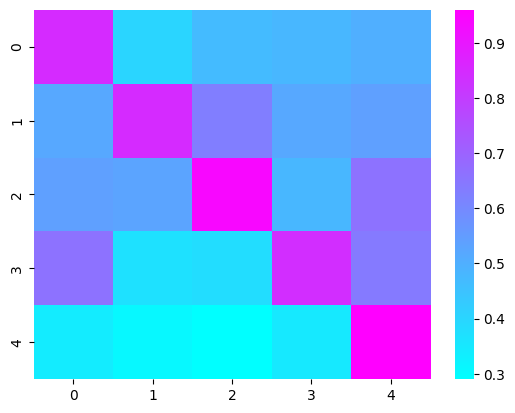

In [57]:
import seaborn
seaborn.heatmap(k,cmap="cool")